# SVM MODEL (REVAMPED)

### DATA PREPROCESSING

In [2]:
import numpy as np
import pandas as pd
import os
import cv2

Covid = os.listdir(r"C:\Users\DELL\Documents\Covid19-dataset\test\Covid")
Normal=os.listdir(r"C:\Users\DELL\Documents\Covid19-dataset\test\Normal")

# import os
# for dirname, _, filenames in os.walk('C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:

train_dir = r"C:\Users\DELL\Documents\Covid19-dataset\train"
test_dir= r"C:\Users\DELL\Documents\Covid19-dataset\test"

In [4]:
categories = ['Covid','Normal']
y_train = []
x_train = []
x_test = []
y_test = []
Batch_Size = 32
INIT_LR = 1e-4
EPOCHES = 10


for category in categories:
    path = os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(500,500))
        image = image / 255
        x_train.append(image)
        y_train.append(category)


for category in categories:
    path = os.path.join(test_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(500,500))
        image = image / 255
        x_test.append(image)
        y_test.append(category)


### LABEL BINARIZER

In [5]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# 1. Feature Extraction: Flatten the image pixels
x_train_flat = np.array([image.flatten() for image in x_train])
x_test_flat = np.array([image.flatten() for image in x_test])

# 2. Data Preparation
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_test_binarized = lb.transform(y_test)
y_train_categorical = to_categorical(y_train_binarized, num_classes=2)
y_test_categorical = to_categorical(y_test_binarized, num_classes=2)
y_train_flat = np.argmax(y_train_categorical, axis=1)
y_test_flat = np.argmax(y_test_categorical, axis=1)

# Optional: Scale the features
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_test_flat = scaler.transform(x_test_flat)


### MODEL TRAINING

In [6]:
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .............................gamma=1, kernel=linear; total time=   3.5s
[CV] END .............................gamma=1, kernel=linear; total time=   3.3s
[CV] END .............................gamma=1, kernel=linear; total time=   3.5s
[CV] END .............................gamma=1, kernel=linear; total time=   3.4s
[CV] END .............................gamma=1, kernel=linear; total time=   3.4s
[CV] END ................................gamma=1, kernel=rbf; total time=  14.7s
[CV] END ................................gamma=1, kernel=rbf; total time=  18.9s
[CV] END ................................gamma=1, kernel=rbf; total time=  16.6s
[CV] END ................................gamma=1, kernel=rbf; total time=  13.6s
[CV] END ................................gamma=1, kernel=rbf; total time=  11.4s
[CV] END ...........................gamma=0.1, kernel=linear; total time=   2.8s
[CV] END ...........................gamma=0.1, ke

In [ ]:

# 3. Model Selection and Hyperparameter Tuning
model = svm.SVC()
param_grid = {'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(model, param_grid, refit=True, verbose=2, cv=5)  # 5-fold cross-validation

# 4. Model Training
grid.fit(x_train_flat, y_train_flat)

# Print best parameters after tuning
print("Best Parameters: ", grid.best_params_)

# 5. Model Evaluation
grid_predictions = grid.predict(x_test_flat)
print("\nClassification Report:\n", classification_report(y_test_flat, grid_predictions))

In [7]:
print("Accuracy: ", accuracy_score(y_test_flat, grid_predictions))

Accuracy:  0.9565217391304348


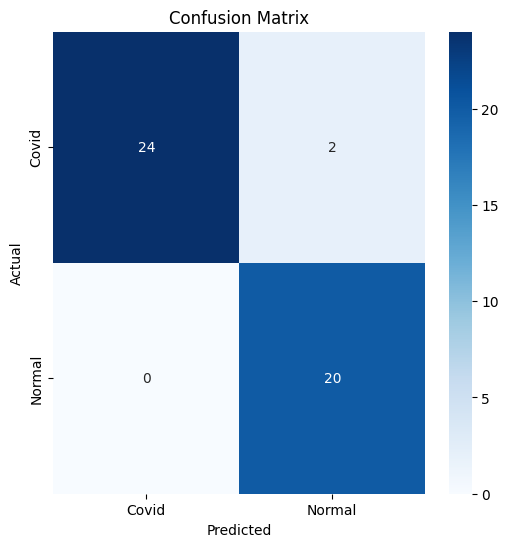

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_flat, grid_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


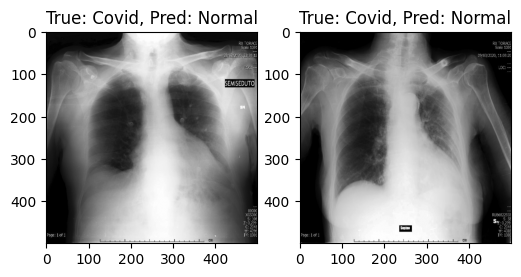

In [9]:
misclassified_idx = np.where(y_test_flat != grid_predictions)[0]
num_misclassified = len(misclassified_idx)
fig, axes = plt.subplots(1, num_misclassified, figsize=(3 * num_misclassified, 12))
for i in range(num_misclassified):
    idx = misclassified_idx[i]
    axes[i].imshow(x_test[idx])
    axes[i].set_title(f"True: {categories[y_test_flat[idx]]}, Pred: {categories[grid_predictions[idx]]}")
plt.show()



### OPTIONAL TRAINING WITH MORE TYPES OF KERNEL

In [15]:
# Train the model with linear kernel
linear_model = svm.SVC(kernel='linear')
linear_model.fit( x_train_flat, y_train_flat)
linear_predictions = linear_model.predict(x_test_flat)
linear_accuracy = accuracy_score(y_test_flat, linear_predictions)
linear_classification_report = classification_report(y_test_flat, linear_predictions)
print("linear_accuracy=",linear_accuracy)
print(linear_classification_report)

linear_accuracy= 0.9565217391304348
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.91      1.00      0.95        20

    accuracy                           0.96        46
   macro avg       0.95      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



In [17]:

# Train the model with RBF kernel
rbf_model = svm.SVC(kernel='rbf')
rbf_model.fit( x_train_flat, y_train_flat)
rbf_predictions = rbf_model.predict(x_test_flat)
rbf_accuracy = accuracy_score(y_test_flat, rbf_predictions)
rbf_classification_report = classification_report(y_test_flat, rbf_predictions)
print("rbf_accuracy: ", rbf_accuracy)
print("rbf_classification_report: ", rbf_classification_report)

rbf_accuracy:  0.9565217391304348
rbf_classification_report:                precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.91      1.00      0.95        20

    accuracy                           0.96        46
   macro avg       0.95      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



In [18]:

# Train the model with sigmoid kernel
sigmoid_model = svm.SVC(kernel='sigmoid')
sigmoid_model.fit( x_train_flat, y_train_flat)
sigmoid_predictions = sigmoid_model.predict(x_test_flat)
sigmoid_accuracy = accuracy_score(y_test_flat, sigmoid_predictions)
sigmoid_classification_report = classification_report(y_test_flat, sigmoid_predictions)
print("sigmoid_accuracy: ", sigmoid_accuracy)
print("sigmoid_classification_report: ", sigmoid_classification_report)


sigmoid_accuracy:  0.9565217391304348
sigmoid_classification_report:                precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.91      1.00      0.95        20

    accuracy                           0.96        46
   macro avg       0.95      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



In [20]:
# Train the model with polynomial kernel
poly_model = svm.SVC(kernel='poly')
poly_model.fit( x_train_flat, y_train_flat)
poly_predictions = poly_model.predict(x_test_flat)
poly_accuracy = accuracy_score(y_test_flat, poly_predictions)
poly_classification_report = classification_report(y_test_flat, poly_predictions)
print("poly_accuracy: ", poly_accuracy)
print("poly_classification_report: ", poly_classification_report)


poly_accuracy:  0.9782608695652174
poly_classification_report:                precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.95      1.00      0.98        20

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46



In [22]:
# 3. Model Selection and Hyperparameter Tuning
model = svm.SVC()
param_grid = {'gamma': [1, 0.1, 0.01], 'kernel': ['poly']}
grid = GridSearchCV(model, param_grid, refit=True, verbose=2, cv=5)  # 5-fold cross-validation

# 4. Model Training
grid.fit(x_train_flat, y_train_flat)

# Print best parameters after tuning
print("Best Parameters: ", grid.best_params_)

# 5. Model Evaluation
grid_predictions_poly = grid.predict(x_test_flat)
print("\nClassification Report:\n", classification_report(y_test_flat, grid_predictions))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...............................gamma=1, kernel=poly; total time=   8.9s
[CV] END ...............................gamma=1, kernel=poly; total time=   9.0s
[CV] END ...............................gamma=1, kernel=poly; total time=   8.8s
[CV] END ...............................gamma=1, kernel=poly; total time=   8.8s
[CV] END ...............................gamma=1, kernel=poly; total time=  10.4s
[CV] END .............................gamma=0.1, kernel=poly; total time=   8.2s
[CV] END .............................gamma=0.1, kernel=poly; total time=   7.7s
[CV] END .............................gamma=0.1, kernel=poly; total time=   7.6s
[CV] END .............................gamma=0.1, kernel=poly; total time=   7.9s
[CV] END .............................gamma=0.1, kernel=poly; total time=   8.0s
[CV] END ............................gamma=0.01, kernel=poly; total time=   7.6s
[CV] END ............................gamma=0.01, 

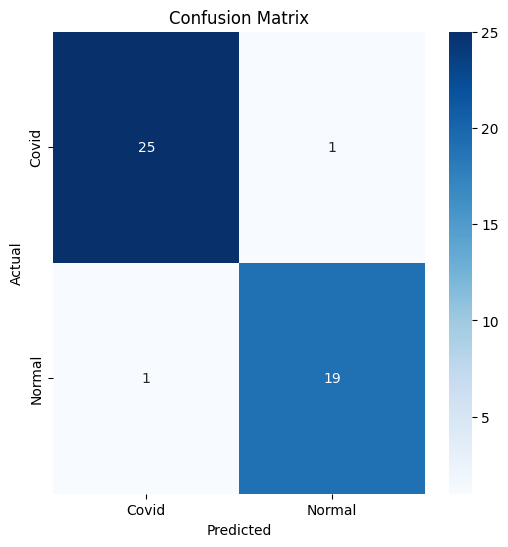

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_flat, grid_predictions_poly)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### MISCLASSIFICATION

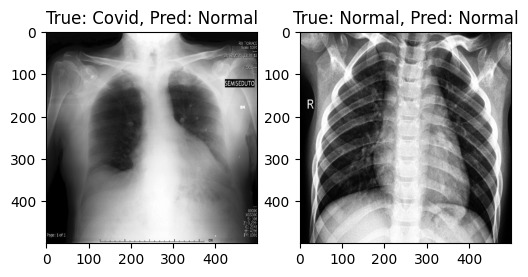

In [26]:
misclassified_idx = np.where(y_test_flat != grid_predictions_poly)[0]
num_misclassified = len(misclassified_idx)
fig, axes = plt.subplots(1, num_misclassified, figsize=(3 * num_misclassified, 12))
for i in range(num_misclassified):
    idx = misclassified_idx[i]
    axes[i].imshow(x_test[idx])
    axes[i].set_title(f"True: {categories[y_test_flat[idx]]}, Pred: {categories[grid_predictions[idx]]}")
plt.show()



### PCA

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Define the range of n_components to search
n_components_range = [1, 2, 3, 4, 5]

# Create a dictionary of parameters to search
param_grid = {'n_components': n_components_range}

# Create the PCA object
pca = PCA()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pca, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train_flat)

# Get the best number of components
best_n_components = grid_search.best_params_['n_components']

# Create a new PCA object with the best number of components
pca_best = PCA(n_components=best_n_components)

# Fit the PCA object to the data
pca_best.fit(x_train_flat)

# Transform the data using the best number of components
x_train_pca_best = pca_best.transform(x_train_flat)
x_test_pca_best = pca_best.transform(x_test_flat)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p

In [37]:
from sklearn.decomposition import PCA

# Create the PCA object with n_components = 3
pca = PCA(n_components=3)

# Fit the PCA object to the data
pca.fit(x_train_flat)

# Transform the data using the PCA object
x_train_pca = pca.transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)


In [28]:
print("Best number of components for PCA:", best_n_components)
print("Variance ratio:", pca_best.explained_variance_ratio_)
print("Sum of variance ratio:", sum(pca_best.explained_variance_ratio_))

Best number of components for PCA: 1
Variance ratio: [0.1615231]
Sum of variance ratio: 0.1615231011772409


### Feature Importance 

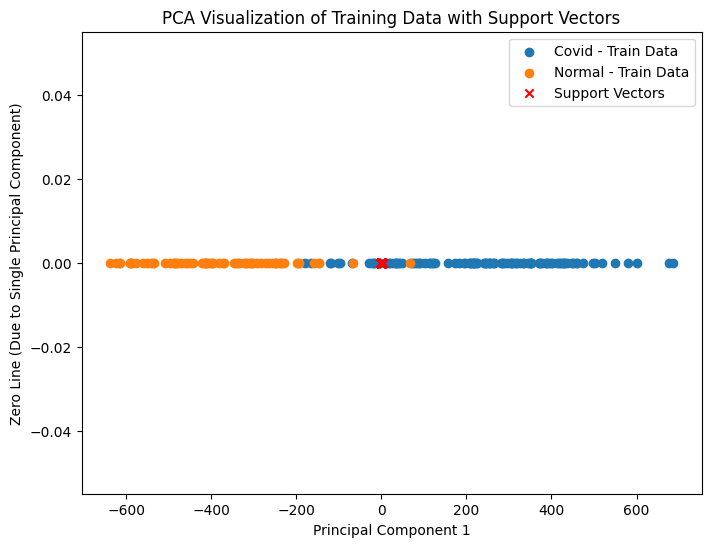

In [35]:
# Plot the support vectors on the PCA-transformed data
plt.figure(figsize=(8, 6))
for category in categories:
    indices = [i for i, label in enumerate(y_train) if label == category]
    plt.scatter(x_train_pca[indices, 0], np.zeros_like(x_train_pca[indices, 0]), label=f'{category} - Train Data')

plt.scatter(support_vectors[:, 0], np.zeros_like(support_vectors[:, 0]), color='red', marker='x', label='Support Vectors')
plt.title('PCA Visualization of Training Data with Support Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Zero Line (Due to Single Principal Component)')
plt.legend()
plt.show()



# Classification Visualisation

### plot it in 2d in a graph 


In [47]:
import numpy as np
import plotly.graph_objects as go

# Create a meshgrid of points for the first two features
x_min, x_max = x_train_flat[:, 0].min() - 1, x_train_flat[:, 0].max() + 1
y_min, y_max = x_train_flat[:, 1].min() - 1, x_train_flat[:, 1].max() + 1
z_min, z_max = x_train_flat[:, 2].min() - 1, x_train_flat[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

# Predict the class for each point in the meshgrid
Z = grid_predictions_poly.reshape(46)

# Create a trace for the data points
data_points_trace = go.Scatter3d(
    x=x_train_flat[:, 0],
    y=x_train_flat[:, 1],
    z=x_train_flat[:, 2],
    mode='markers',
    marker=dict(
        size=8,
        color=y_train_flat,
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Data Points'
)

# Create a trace for the support vectors
support_vectors_trace = go.Scatter3d(
    x=grid.best_estimator_.support_vectors_[:, 0],
    y=grid.best_estimator_.support_vectors_[:, 1],
    z=grid.best_estimator_.support_vectors_[:, 2],
    mode='markers',
    marker=dict(
        size=12,
        color='red',
        opacity=0.8
    ),
    name='Support Vectors'
)

# Create a trace for the decision boundary
decision_boundary_trace = go.Surface(
    x=xx,
    y=yy,
    z=Z,
    colorscale='Viridis',
    opacity=0.6,
    showscale=False,
    name='Decision Boundary'                                                                                                                                                                                                                                                    
)

# Create the layout
layout = go.Layout(
    title='3D Decision Boundary Visualization with Support Vectors',
    scene=dict(
        xaxis=dict(title='Feature 1'),
        yaxis=dict(title='Feature 2'),
        zaxis=dict(title='Feature 3')
    )
)

# Create the figure
fig = go.Figure(data=[data_points_trace, support_vectors_trace, decision_boundary_trace], layout=layout)

# Save the figure as an HTML file
fig.write_html('3d_decision_boundary_visualization.html')
